It's time to dive into the Hugging Face ecosystem! You'll start by learning the basics of the pipeline module and Auto classes from the transformers library. Then, you'll learn at a high level what natural language processing and tokenization is. Finally, you'll start using the pipeline module for several text-based tasks, including text classification.

In [1]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

### Creating Model Pipeline for 'Sentiment Analysis'

In [2]:
# Import pipeline
from transformers import pipeline

input = 'This course is pretty good, I guess.'

# Create the task pipeline
task_pipeline = pipeline(task="sentiment-analysis")

# Create the model pipeline
model_pipeline = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
task_output = task_pipeline(input)
model_output = model_pipeline(input)

print(f"Sentiment from task_pipeline: {task_output[0]['label']}; Sentiment from model_pipeline: {model_output[0]['label']}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentiment from task_pipeline: POSITIVE; Sentiment from model_pipeline: POSITIVE


In [4]:
# Import pipeline
from transformers import pipeline

input = 'This course is pretty good, I guess.'

# Create the task pipeline with a specific model and revision
task_pipeline = pipeline(task="sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", revision="main")

# Create the model pipeline with a specific revision
model_pipeline = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english", revision="main")

# Predict the sentiment
task_output = task_pipeline(input)
model_output = model_pipeline(input)

print(f"Sentiment from task_pipeline: {task_output[0]['label']}; Sentiment from model_pipeline: {model_output[0]['label']}")


Sentiment from task_pipeline: POSITIVE; Sentiment from model_pipeline: POSITIVE


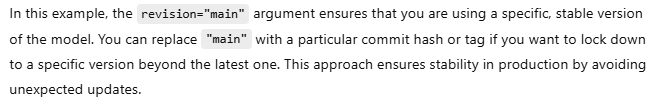

In [6]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

# Download the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Create the pipeline
sentimentAnalysis = pipeline(task="sentiment-analysis", model=model, tokenizer=tokenizer)

# Predict the sentiment
output = sentimentAnalysis(input)

print(f"Sentiment using AutoClasses: {output[0]['label']}")

Sentiment using AutoClasses: POSITIVE


### Comparing models with the pipeline

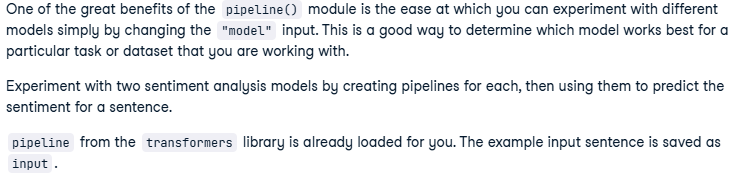

In [7]:
# Create the pipeline
distil_pipeline = pipeline(task="sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
distil_output = distil_pipeline(input)

# Create the second pipeline and predict the sentiment
bert_pipeline = pipeline(task="sentiment-analysis", model="kwang123/bert-sentiment-analysis")
bert_output = bert_pipeline(input)

print(f"Bert Output: {bert_output[0]['label']}")
print(f"Distil Output: {distil_output[0]['label']}")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

c:\Users\Imran\anaconda3\envs\aieng-env\aieng-env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Imran\.cache\huggingface\hub\models--kwang123--bert-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Error while downloading from https://huggingface.co/kwang123/bert-sentiment-analysis/resolve/main/vocab.txt: HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out.
Trying to resume download...


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Bert Output: Extremely Positive
Distil Output: POSITIVE


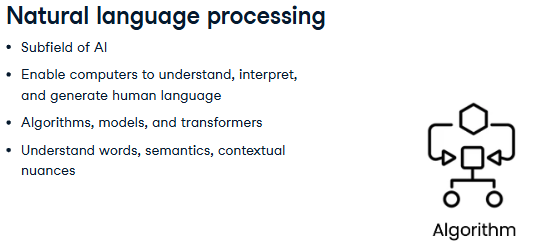  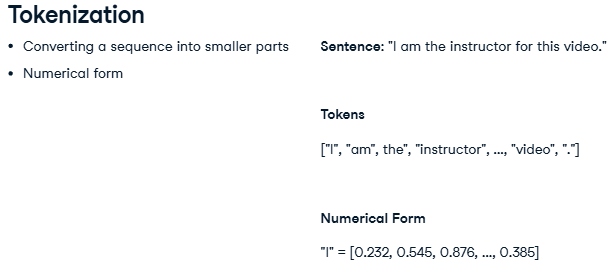

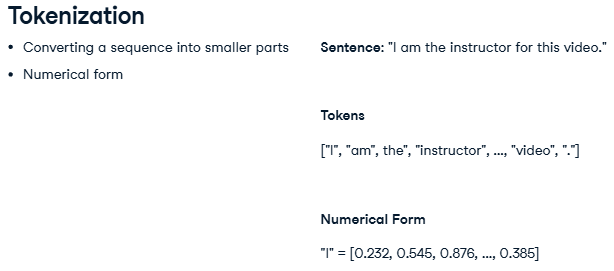  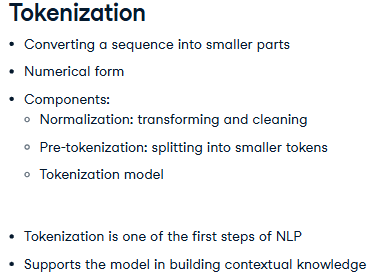

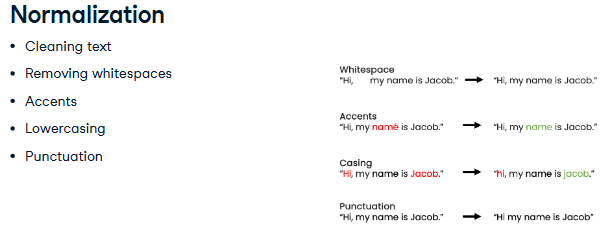

In [9]:
# Import the AutoTokenizer
from transformers import AutoTokenizer

input_string = "HOWDY, how aré yoü?"

# Download the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Normalize the input string
output = tokenizer.backend_tokenizer.normalizer.normalize_str(input_string)

print(output)

howdy, how are you?


In [13]:
from transformers import DistilBertTokenizer, GPT2Tokenizer

# Define the input text
input_text = 'pineapple on pizza is pretty good, I guess.'

# Download the GPT-2 tokenizer
gpt_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the input using GPT-2 tokenizer
gpt_tokens = gpt_tokenizer.tokenize(text=input_text)

# Download the DistilBERT tokenizer
distil_tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Tokenize the input using DistilBERT tokenizer
distil_tokens = distil_tokenizer.tokenize(text=input_text)

# Compare the output
print(f"GPT-2 tokenizer: {gpt_tokens}")
print(f"DistilBERT tokenizer: {distil_tokens}")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

c:\Users\Imran\anaconda3\envs\aieng-env\aieng-env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Imran\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

GPT-2 tokenizer: ['pine', 'apple', 'Ġon', 'Ġpizza', 'Ġis', 'Ġpretty', 'Ġgood', ',', 'ĠI', 'Ġguess', '.']
DistilBERT tokenizer: ['pine', '##apple', 'on', 'pizza', 'is', 'pretty', 'good', ',', 'i', 'guess', '.']


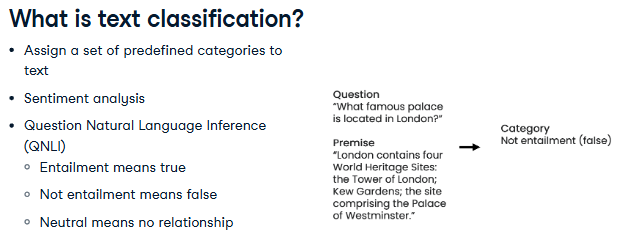 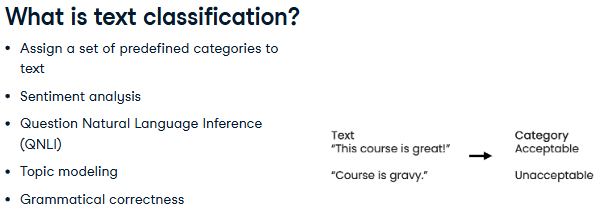

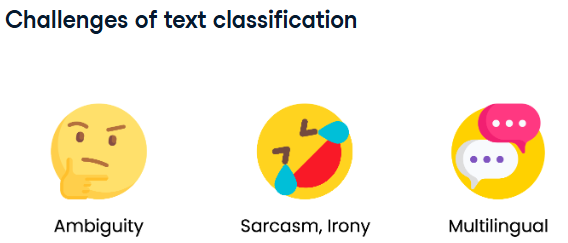

### Grammatical Correctness

In [14]:
# Create a pipeline
classifier = pipeline(
  task="text-classification", 
  model="abdulmatinomotoso/English_Grammar_Checker"
)

# Predict classification
output = classifier("I will walk dog")

print(output)

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

c:\Users\Imran\anaconda3\envs\aieng-env\aieng-env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Imran\.cache\huggingface\hub\models--abdulmatinomotoso--English_Grammar_Checker. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[{'label': 'LABEL_0', 'score': 0.9956323504447937}]


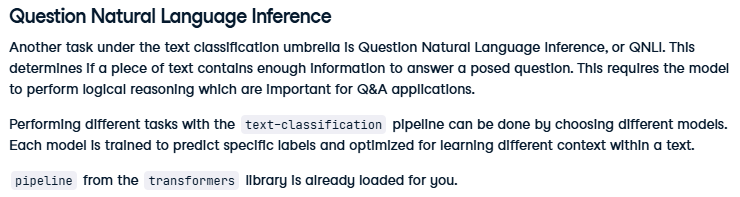

In [15]:
# Create the pipeline
classifier = pipeline(task="text-classification", model="cross-encoder/qnli-electra-base")

# Predict the output
output = classifier("Where is the capital of France?, Brittany is known for their kouign-amann.")

print(output)

config.json:   0%|          | 0.00/771 [00:00<?, ?B/s]

c:\Users\Imran\anaconda3\envs\aieng-env\aieng-env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Imran\.cache\huggingface\hub\models--cross-encoder--qnli-electra-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/268 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'LABEL_0', 'score': 0.0052389358170330524}]


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

### Zero SHot Classification

In [16]:
text = 'A 75-million-year-old Gorgosaurus fossil is the first tyrannosaur skeleton ever found with a filled stomach.'

# Build the zero-shot classifier
classifier = pipeline(task="zero-shot-classification", model="facebook/bart-large-mnli")

# Create the list
candidate_labels = ["politics", "science", "sports"]

# Predict the output
output = classifier(text, candidate_labels)

print(f"Top Label: {output['labels'][0]} with score: {output['scores'][0]}")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

c:\Users\Imran\anaconda3\envs\aieng-env\aieng-env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Imran\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Top Label: science with score: 0.903059720993042


### Summarization

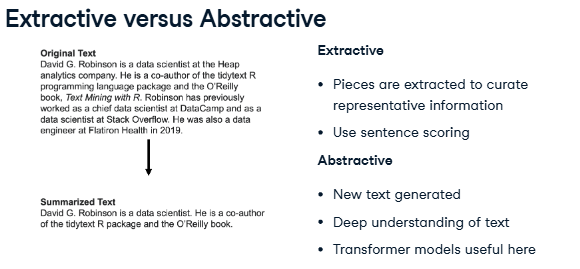  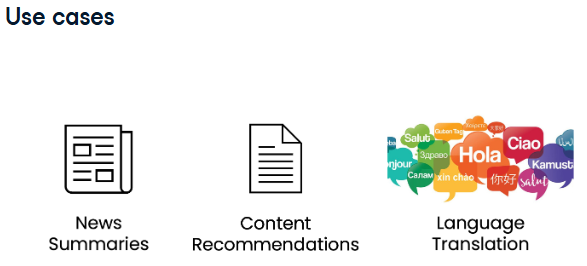

In [17]:
original_text = '\nGreece has many islands, with estimates ranging from somewhere around 1,200 to 6,000, depending on the minimum size to take into account. The number of inhabited islands is variously cited as between 166 and 227.\nThe Greek islands are traditionally grouped into the following clusters: the Argo-Saronic Islands in the Saronic Gulf near Athens; the Cyclades, a large but dense collection occupying the central part of the Aegean Sea; the North Aegean islands, a loose grouping off the west coast of Turkey; the Dodecanese, another loose collection in the southeast between Crete and Turkey; the Sporades, a small tight group off the coast of Euboea; and the Ionian Islands, chiefly located to the west of the mainland in the Ionian Sea. Crete with its surrounding islets and Euboea are traditionally excluded from this grouping.\n'

# Create the summarization pipeline
summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum")

# Summarize the text
summary_text = summarizer(original_text)

# Compare the length
print(f"Original text length: {len(original_text)}")
print(f"Summary length: {len(summary_text[0]['summary_text'])}")

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

c:\Users\Imran\anaconda3\envs\aieng-env\aieng-env\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Imran\.cache\huggingface\hub\models--cnicu--t5-small-booksum. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Original text length: 829
Summary length: 473


In [18]:
# Create a short summarizer
short_summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum", min_length=1, max_length=10)

# Summarize the input text
short_summary_text = short_summarizer(original_text)

# Print the short summary
print(short_summary_text[0]["summary_text"])

Greece has many islands, with estimates ranging


In [ ]:
wiki = {features: ['id', 'url', 'title', 'text'], num_rows: 1000}


# Create the list
text_to_summarize = [w["text"] for w in wiki]

# Create the pipeline
summarizer = pipeline("summarization", model="cnicu/t5-small-booksum", min_length=20, max_length=50)

# Summarize each item in the list
summaries = summarizer(text_to_summarize[:3], truncation=True)

# Create for-loop to print each summary
for i in range(0,3):
  print(f"Summary {i+1}: {summaries[i]['summary_text']}")